1. ***Data Preprossesing***

Purpose:

1. To have first visual of Data

2. To handle missing values properly 

3. Feature Engineering: To create new features like car age (2024 - Make_Year), price per kilometer, or any other domain-specific variables that may influence pricing.

4. Categorical Encoding

In [282]:
# Importing Required libraies
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [283]:
#Loading Data Sets
Ahmedabad_data = pd.read_csv('Ahmedabad.csv')
Banglore_data = pd.read_csv('Banglore.csv')
Car_data = pd.read_csv('Car_data.csv')
Chennai_data = pd.read_csv('Chennai.csv')
Gurgaon_data = pd.read_csv('Gurgaon.csv')
Hyderabad_data = pd.read_csv('Hyderabad.csv')
Jaipur_data = pd.read_csv('Jaipur.csv')
Kolkata_data = pd.read_csv('Kolkata.csv')
Mumbai_data = pd.read_csv('Mumbai.csv')
Pune_data = pd.read_csv('Pune.csv')

In [284]:
#combining all the data sets
combined_data = pd.concat([Ahmedabad_data, Banglore_data, Car_data, Chennai_data, Gurgaon_data, Hyderabad_data, Jaipur_data, Kolkata_data, Mumbai_data, Pune_data], ignore_index=True)



In [285]:
# Renaming the variable combined_data to Data
Data = combined_data


In [286]:
# Check the shape of the Data
print(Data.shape)


(10394, 21)


In [287]:
Data.head()


,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price
0,0,2020 Maruti Swift Dzire,2019,Petrol,"11,935 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,Grey,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,80,000"
1,1,2016 Nissan Terrano,2016,Diesel,"74,555 Kms",1461 cc,2nd Owner,Manual,20.45 kmpl,83.8bhp,...,5,Black,5 Speed,FWD,Power,Disc,Drum,14 Seconds,K9K Diesel Engine,"4,70,500"
2,2,2020 Maruti Swift Dzire,2019,Petrol,"9,379 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,White,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,75,000"
3,3,2018 Maruti Swift,2018,Diesel,"31,824 Kms",1248 cc,1st Owner,Manual,28.4 kmpl,74bhp,...,5,Red,5,FWD,Power,Disc,Drum,NaN,DDiS 190 Engine,"6,00,000"
4,4,2017 Maruti Baleno,2017,Petrol,"49,072 Kms",1197 cc,1st Owner,Manual,21.01 kmpl,81.80bhp,...,5,Blue,5 Speed,FWD,Electric,Disc,Drum,12.36 seconds,1.2L VVT Engine,"6,10,000"


Inspecting the Data: Check data types, null values, and the general structure of the dataset.

In [288]:
Data.info()  # Shows data types and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10394 entries, 0 to 10393
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10394 non-null  int64 
 1   Brand                10394 non-null  object
 2   Make_Year            10394 non-null  int64 
 3   Fuel                 10394 non-null  object
 4   KMs_Driven           10394 non-null  object
 5   Engine_Displacement  10394 non-null  object
 6   No_Of_Owner          10394 non-null  object
 7   Transmission         10394 non-null  object
 8   Mileage              10394 non-null  object
 9   Max_Power            10394 non-null  object
 10  Torque               10394 non-null  object
 11  Seats                10394 non-null  int64 
 12  Color                10394 non-null  object
 13  Gear_Box             10386 non-null  object
 14  Drive_Type           10208 non-null  object
 15  Steering_Type        10344 non-null  object
 16  Fron

**DataFrame Summary**

Total Entries: 10,394 rows (indexed from 0 to 10,393).

Total Columns: 21 columns.

**Column Details**

**Data Types:**

int64: 3 columns (e.g., Unnamed: 0, Make_Year, Seats).

object: 18 columns (e.g., Brand, Fuel, KMs_Driven, etc.).

**Non-Null Counts**

Most columns have 10,394 non-null entries, indicating no missing values.

Some columns have missing values:

Gear_Box: 10,386 non-null entries.

Drive_Type: 10,208 non-null entries.

Steering_Type: 10,344 non-null entries.

Front_Brake_Type: 10,346 non-null entries.

Rear_Brake_Type: 10,346 non-null entries.

Acceleration: 9,320 non-null entries.

Engine_Type: 5,144 non-null entries.


**Conclusion**
The DataFrame contains a mix of integer and object data types, with some columns having missing values. Most columns are fully populated, while a few require attention for missing data.

2. ***Exploratory Data Analysis***

Visualizations: To create plots to visualize relationships between features and the target variable (e.g., price).

To understand distributions, correlations, and trends in the data.

Feature Importance: Identify which features are most important for predicting the target variable.

In [289]:
# Display summary statistics
print(Data.describe())

         Unnamed: 0     Make_Year         Seats
count  10394.000000  10394.000000  10394.000000
mean    1460.271984   2014.891861      5.188378
std     1563.455786      3.094559      0.653699
min        0.000000   1995.000000      2.000000
25%      262.000000   2013.000000      5.000000
50%      594.000000   2015.000000      5.000000
75%     2597.750000   2017.000000      5.000000
max     5196.000000   2021.000000      9.000000


The dataset provides a broad range of used cars, with model years spanning from 1995 to 2021, and a significant variation in mileage, ranging from 200 km to over 2.15 million km. 

The average car age is approximately 9 years, with a typical car having 5 seats. While most cars have a moderate mileage of around 59,309 km, there is considerable variation in both car age and kilometers driven. 

The seats column shows minimal variation, mostly containing cars with 5 seats. Overall, the dataset reflects a mix of newer and older cars with diverse usage, offering a broad spectrum of vehicles for analysis.

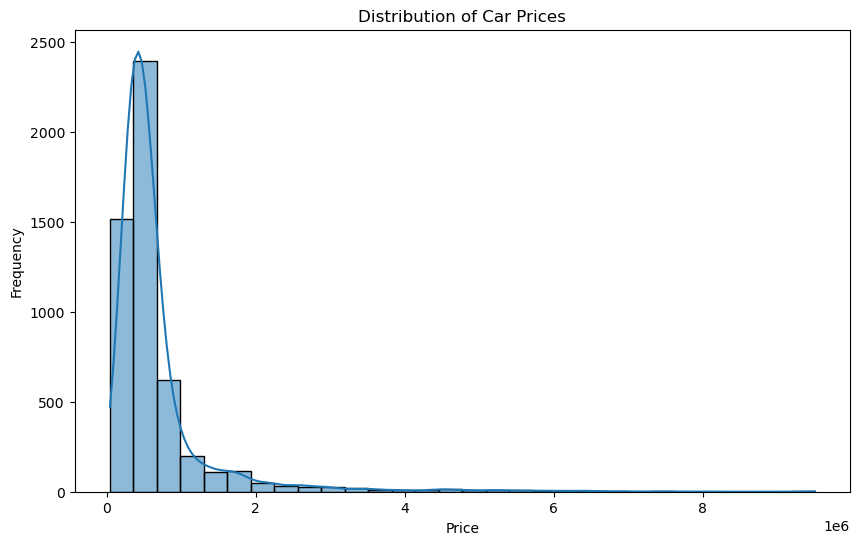

In [290]:
#Data Visualization
#Distribution of Numerical Features: Using histograms to visualize the distribution of numerical features.
# Convert 'Price' to numeric values, forcing errors to NaN
Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')

# Drop rows with NaN values in 'Price' (optional, based on your preference)
Data = Data.dropna(subset=['Price'])

# Now plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(Data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


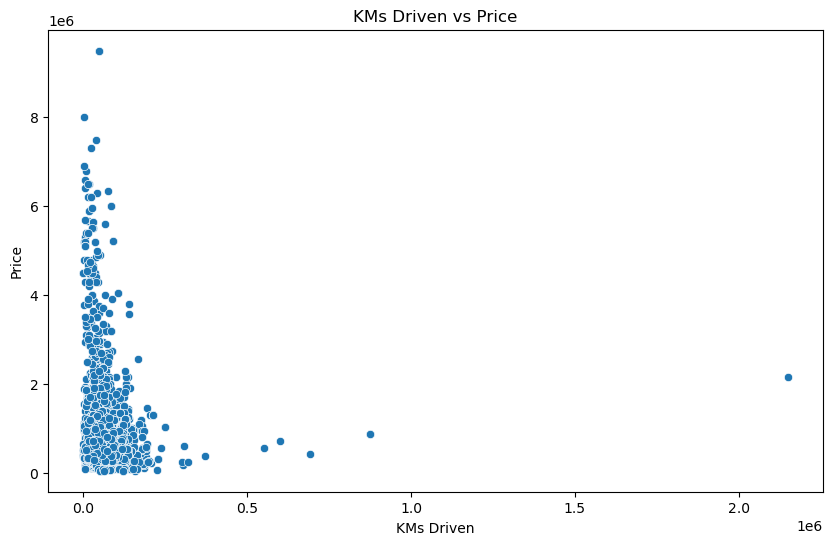

In [291]:
#Scatter Plot: Visualize the relationship between two numerical features.
# Scatter plot of KMs_Driven vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='KMs_Driven', y='Price')
plt.title('KMs Driven vs Price')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.show()

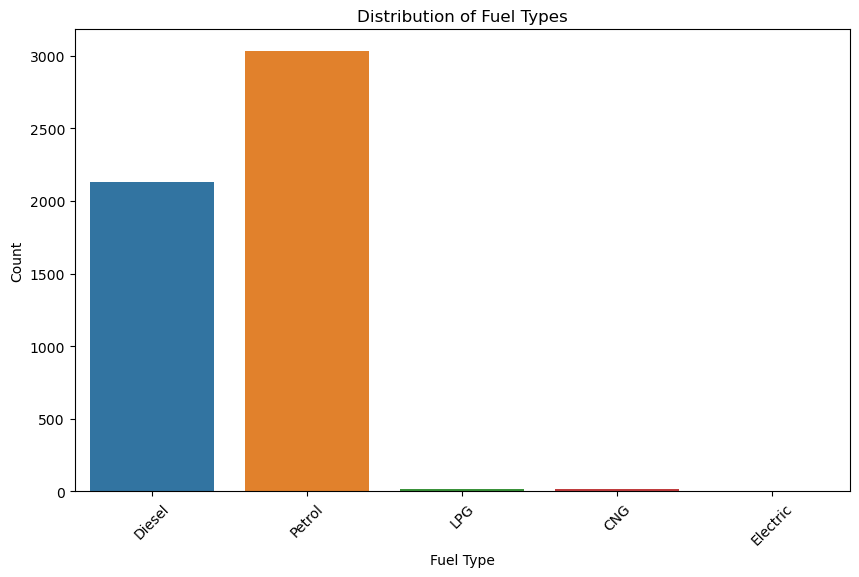

In [300]:
# Categorical Analysis
# Count plot for the 'Fuel' column
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Fuel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In the bar chart, we see the distribution of various fuel types for the vehicles in our dataset. Here's a breakdown of the insights:

Petrol: This fuel type has the highest count, exceeding 3,000. This suggests that petrol vehicles are the most common in the dataset.

Diesel: Diesel vehicles are also quite common, with over 2,000 entries, making them the second most frequent fuel type after petrol.

Other Fuel Types (LPG, CNG, Electric): These fuel types have very low counts, close to zero compared to petrol and diesel. This indicates that vehicles with these alternative fuel types are rare in your dataset.

Key Takeaways

Market Composition: Petrol and diesel vehicles dominate the dataset, which may reflect general market trends or the specific focus of our data collection.

Low Representation of Alternative Fuels: The small counts of LPG, CNG, and electric vehicles suggest limited representation of these types. This might impact analyses if you want to include these fuels in comparative studies due to sample size limitations.

Further Analysis: It may be valuable to investigate other factors, such as vehicle age, mileage, or brand, in relation to fuel type to gain deeper insights into each category.

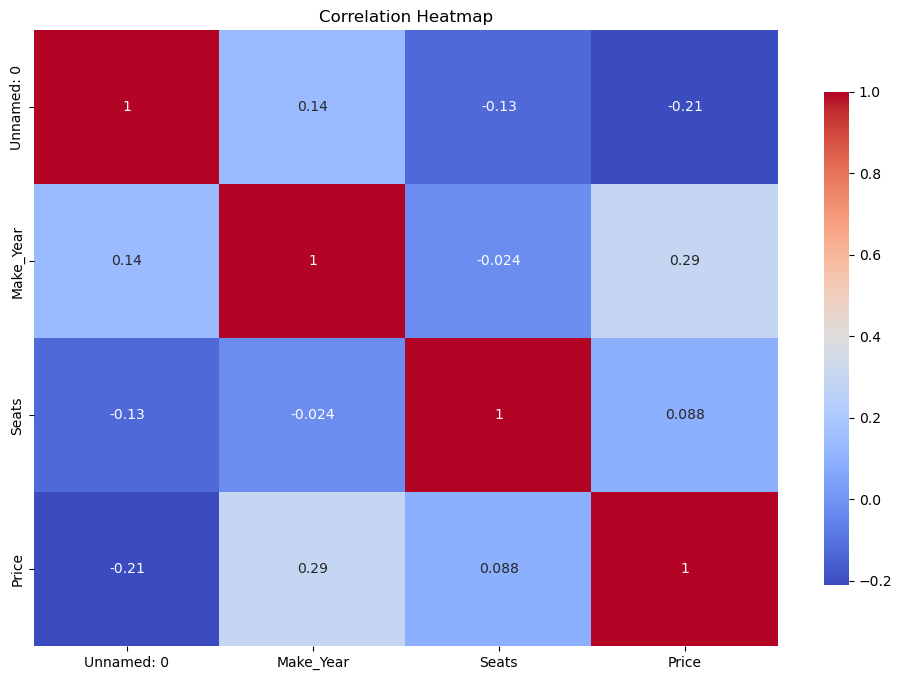

In [293]:
#Correlation Analysis
#Correlation Heatmap to visualize the correlation between numerical features.
# Select only numeric columns
numeric_cols = Data.select_dtypes(include=['float64', 'int64']).columns
Data_numeric = Data[numeric_cols]

# Drop rows with missing values
Data_numeric = Data_numeric.dropna()

# Compute the correlation matrix
corr_matrix = Data_numeric.corr()

# Plot heatmap with optimized settings
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()


In [294]:
#Box Plot to compare the distribution of a numerical variable across different categories.


2. Feature Engineering

In this step of the project we will extract all the required features for our model devlopment and convert the categorical features
into numerical feature 

In [295]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 950 to 6146
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5197 non-null   int64  
 1   Brand                5197 non-null   object 
 2   Make_Year            5197 non-null   int64  
 3   Fuel                 5197 non-null   object 
 4   KMs_Driven           5197 non-null   object 
 5   Engine_Displacement  5197 non-null   object 
 6   No_Of_Owner          5197 non-null   object 
 7   Transmission         5197 non-null   object 
 8   Mileage              5197 non-null   object 
 9   Max_Power            5197 non-null   object 
 10  Torque               5197 non-null   object 
 11  Seats                5197 non-null   int64  
 12  Color                5197 non-null   object 
 13  Gear_Box             5197 non-null   object 
 14  Drive_Type           5104 non-null   object 
 15  Steering_Type        5172 non-null  

In [296]:
#The dataset contains 21 columns with a total of 10,394 entries. 
# It includes a mix of numerical and categorical data. 
# Key columns include Brand, Make_Year, Fuel, KMs_Driven, Engine_Displacement, 
# and Price, with several columns containing missing values, such 
# as Engine_Type (5,144 non-null) and Acceleration (9,320 non-null).
#  Most columns are of the object data type, with a few integer columns like Seats and 
# Unnamed: 0. Several columns like Drive_Type, Gear_Box, Steering_Type, 
# and Brake_Type have fewer non-null entries, indicating missing or incomplete data. 
# The Price column, essential for price prediction, is in object format, likely requiring conversion to numeric.

In [297]:
# Get the count of missing values in each column
missing_values = Data.isnull().sum()
print(missing_values)



Unnamed: 0                0
Brand                     0
Make_Year                 0
Fuel                      0
KMs_Driven                0
Engine_Displacement       0
No_Of_Owner               0
Transmission              0
Mileage                   0
Max_Power                 0
Torque                    0
Seats                     0
Color                     0
Gear_Box                  0
Drive_Type               93
Steering_Type            25
Front_Brake_Type         24
Rear_Brake_Type          24
Acceleration            537
Engine_Type            5197
Price                     0
dtype: int64


In [298]:
# Fill missing values for categorical columns with mode
Data[['Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']] = Data[['Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']].fillna(Data.mode().iloc[0])

# Clean the 'Acceleration' column and convert it to numeric
Data['Acceleration'] = pd.to_numeric(Data['Acceleration'].str.extract('(\d+\.?\d*)')[0], errors='coerce')

# Fill missing values for 'Acceleration' with median
Data['Acceleration'].fillna(Data['Acceleration'].median(), inplace=True)

# Verify if the missing values are filled
print(Data[['Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type', 'Acceleration']].isnull().sum())


AttributeError: Can only use .str accessor with string values!

From above we can see that there are no missing values:

In [253]:
# 2. Convert Data Types
Data['Make_Year'] = Data['Make_Year'].astype(int)  # Ensure Make_Year is int
Data['Seats'] = Data['Seats'].astype(int)  # Ensure Seats is int

In [254]:
# Check for duplicates in the dataset
duplicates = Data.duplicated().sum()

# Display the result
print(f'Total number of duplicate rows: {duplicates}')


Total number of duplicate rows: 500


In [255]:
# Create a new column for the age of the car
Data['Car_Age'] = 2024 - Data['Make_Year']  # Assuming current year is 2024

# Display the first few rows to confirm the new column
print(Data[['Make_Year', 'Car_Age']].head())


   Make_Year  Car_Age
0       2019        5
1       2016        8
2       2019        5
3       2018        6
4       2017        7


In [256]:
print(Data['Price'].dtype)
print(Data['Car_Age'].dtype)


object
int32


In [257]:
#This can help track how the price of a car depreciates annually, which is useful for price prediction models.

# Ensure 'Price' column is treated as a string before replacing commas
Data['Price'] = Data['Price'].astype(str)

# Remove commas from the 'Price' column
Data['Price'] = Data['Price'].replace({',': ''}, regex=True)

# Convert 'Price' to numeric, coercing errors to NaN
Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')

# Convert 'Car_Age' to numeric, coercing errors to NaN
Data['Car_Age'] = pd.to_numeric(Data['Car_Age'], errors='coerce')

# Handle missing values by filling with median
Data['Price'].fillna(Data['Price'].median(), inplace=True)
Data['Car_Age'].fillna(Data['Car_Age'].median(), inplace=True)

# Create the 'Price_per_Year' column
Data['Price_per_Year'] = Data['Price'] / Data['Car_Age']
print(Data[['Price', 'Car_Age', 'Price_per_Year']].head())


      Price  Car_Age  Price_per_Year
0  680000.0        5   136000.000000
1  470500.0        8    58812.500000
2  675000.0        5   135000.000000
3  600000.0        6   100000.000000
4  610000.0        7    87142.857143


In [258]:
#Seats to Price Ratio:. Sometimes the number of seats in a car can influence its price, so this ratio can provide more insight.
Data['Seats_to_Price'] = Data['Seats'] / Data['Price']
print(Data['Seats_to_Price'].head())


0    0.000007
1    0.000011
2    0.000007
3    0.000008
4    0.000008
Name: Seats_to_Price, dtype: float64


In [259]:
Data.shape

(10394, 24)

In [260]:
#Check columns
Data.columns

Index(['Unnamed: 0', 'Brand', 'Make_Year', 'Fuel', 'KMs_Driven',
       'Engine_Displacement', 'No_Of_Owner', 'Transmission', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Color', 'Gear_Box', 'Drive_Type',
       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration',
       'Engine_Type', 'Price', 'Car_Age', 'Price_per_Year', 'Seats_to_Price'],
      dtype='object')

In [261]:
categorical_columns = [
    'Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type',
    'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type'
]


In [262]:
# Ensure the columns exist in the DataFrame before encoding
available_columns = [col for col in categorical_columns if col in Data.columns]

# Apply one-hot encoding
Data = pd.get_dummies(Data, columns=available_columns, drop_first=True)


In [263]:
Data.shape

(10394, 2682)

In [270]:
import pandas as pd

# Sample columns that may need conversion to numeric
columns_to_clean = ['KMs_Driven']

# Remove non-numeric characters and convert to numeric for specified columns
for col in columns_to_clean:
    if col in Data.columns:  # Ensure the column exists
        # Remove commas and any trailing non-numeric text, then convert to numeric
        Data[col] = Data[col].replace({',': '', '[^\d.]': ''}, regex=True).astype(float)

# Proceed with other transformations or PCA
from sklearn.decomposition import PCA

# Ensure no object (non-numeric) columns remain
Data_numeric = Data.select_dtypes(include=[float, int])

# Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
Data_reduced = pca.fit_transform(Data_numeric)

print("Reduced Data Shape:", Data_reduced.shape)


Reduced Data Shape: (10394, 1)


This method is useful for checking and understanding the distribution of values in categorical columns, while also ensuring that each specified column exists in the dataset.








In [264]:
# Step 1: List the actual columns in your DataFrame
print("Original column names:", Data.columns)

# Step 2: Clean column names by stripping extra spaces or hidden characters
Data.columns = Data.columns.str.strip()
print("Cleaned column names:", Data.columns)

# Step 3: Check for missing categorical columns
categorical_columns = ['Brand', 'Engine_Type', 'Fuel', 'Drive_Type', 'Color']
missing_columns = [col for col in categorical_columns if col not in Data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Step 4: Apply get_dummies if all columns are present
    Data = pd.get_dummies(Data, columns=categorical_columns, drop_first=True)
    print("Shape after encoding:", Data.shape)


Original column names: Index(['Unnamed: 0', 'Make_Year', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Mileage', 'Max_Power', 'Torque', 'Seats',
       'Acceleration',
       ...
       'Engine_Type_mHawk 130 Engine', 'Engine_Type_mHawk 80 Diesel Engine',
       'Engine_Type_mHawk CRDe Engine', 'Engine_Type_mHawk Diesel Engine',
       'Engine_Type_mHawk155 Diesel Engine',
       'Engine_Type_mStallion 150 TGDi Engine', 'Engine_Type_sDrive 18i',
       'Engine_Type_sDrive20d Diesel Engine',
       'Engine_Type_xDrive20d Diesel Engine',
       'Engine_Type_xDrive30d Diesel Engine'],
      dtype='object', length=2682)
Cleaned column names: Index(['Unnamed: 0', 'Make_Year', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Mileage', 'Max_Power', 'Torque', 'Seats',
       'Acceleration',
       ...
       'Engine_Type_mHawk 130 Engine', 'Engine_Type_mHawk 80 Diesel Engine',
       'Engine_Type_mHawk CRDe Engine', 'Engine_Type_mHawk Diesel Engine',
       'Engine_Typ

In [265]:
Data.shape

(10394, 2682)

In [266]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type', 
                       'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']

# Handle rare categories by grouping them into 'Other' for columns with many unique categories
threshold = 10  # Set a threshold for the minimum occurrences

for column in categorical_columns:
    if column in Data.columns:
        # Check if there are too many unique categories (i.e., more than 'threshold')
        unique_counts = Data[column].value_counts()
        
        if unique_counts.nunique() > threshold:
            rare_categories = unique_counts[unique_counts < threshold].index
            Data[column] = Data[column].replace(rare_categories, 'Other')  # Replace rare categories with 'Other'
            
# Now apply Label Encoding for columns with fewer categories and One-Hot Encoding for others
for column in categorical_columns:
    if column in Data.columns:
        if Data[column].nunique() <= threshold:  # Apply Label Encoding for fewer categories
            label_encoder = LabelEncoder()
            Data[column] = label_encoder.fit_transform(Data[column])
        else:  # Apply One-Hot Encoding for many categories
            Data = pd.get_dummies(Data, columns=[column], drop_first=True)

# Check the shape of the DataFrame after encoding
print(f"Data shape after encoding: {Data.shape}")


Data shape after encoding: (10394, 2682)


#### Scaling the data Using StandardScaler

In [267]:
# Dividing into Feature and Target data
x=Data.drop(['Price'],axis=1)
y=Data['Price']

In [268]:
# Remove commas from 'Price' column and convert it to numeric
Data['Price'] = Data['Price'].replace({',': ''}, regex=True).astype(float)

# Check if the conversion was successful
print(Data['Price'].head())

# Now scale the selected columns: 'Price', 'Car_Age', 'KMs_Driven'
scaler = MinMaxScaler()
Data[['Price', 'Car_Age', 'KMs_Driven']] = scaler.fit_transform(Data[['Price', 'Car_Age', 'KMs_Driven']])

# Verify the result
print(Data[['Price', 'Car_Age', 'KMs_Driven']].head())


TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [40]:
# 5. Normalization/Standardization
# Converting 'KMs_Driven' to string, remove non-numeric characters, replace empty strings with NaN, then convert to float
Data['KMs_Driven'] = (
    Data['KMs_Driven']
    .astype(str)
    .str.replace(r'\D', '', regex=True)
    .replace('', float('nan'))  # Replace empty strings with NaN
    .astype(float)  # Convert to float
)

# Optionally, handle NaN values if needed (e.g., filling with the mean or dropping them)
Data['KMs_Driven'].fillna(Data['KMs_Driven'].mean(), inplace=True)  # Fill NaNs with mean value



In [41]:
# 6. Drop Empty Columns
Data = Data.dropna(axis=1, how='all')

In [49]:
Data.shape

(5197, 2273)

In [42]:
def preprocess_data(Data):
    # Define categorical columns to encode
    categorical_columns = ['Brand', 'Fuel', 'Transmission', 'Color']
    
    # Filter out columns that are missing from the data
    available_columns = [col for col in categorical_columns if col in Data.columns]
    missing_columns = [col for col in categorical_columns if col not in Data.columns]
    
    # Warn if any expected columns are missing
    if missing_columns:
        print(f"Warning: The following columns are missing and will not be encoded: {missing_columns}")
    
    # Apply one-hot encoding only to available categorical columns
    if available_columns:
        Data = pd.get_dummies(Data, columns=available_columns, drop_first=True)
    
    return Data


In [43]:
# Apply preprocessing to the DataFrame
Data = preprocess_data(Data)


In [44]:
# Display the preprocessed DataFrame
Data.head()

,Unnamed: 0,Make_Year,KMs_Driven,Engine_Displacement,No_Of_Owner,Mileage,Max_Power,Torque,Seats,Gear_Box,...,Color_garnite grey,Color_golden brown,Color_granite cystal metallic clearcoat,Color_metallic grey,Color_midnight blue,Color_modern steel,Color_nexa blue,Color_rayol gold,Color_star dust,Color_titanium metalic
0,0,2019,11935.0,1197 cc,1st Owner,21.21 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
1,1,2016,74555.0,1461 cc,2nd Owner,20.45 kmpl,83.8bhp,200Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
2,2,2019,9379.0,1197 cc,1st Owner,21.21 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
3,3,2018,31824.0,1248 cc,1st Owner,28.4 kmpl,74bhp,190Nm,5,5,...,0,0,0,0,0,0,0,0,0,0
4,4,2017,49072.0,1197 cc,1st Owner,21.01 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Drops columns that are entirely NaN
Data = Data.dropna(axis=1, how='all')


In [46]:
Data.head()

,Unnamed: 0,Make_Year,KMs_Driven,Engine_Displacement,No_Of_Owner,Mileage,Max_Power,Torque,Seats,Gear_Box,...,Color_garnite grey,Color_golden brown,Color_granite cystal metallic clearcoat,Color_metallic grey,Color_midnight blue,Color_modern steel,Color_nexa blue,Color_rayol gold,Color_star dust,Color_titanium metalic
0,0,2019,11935.0,1197 cc,1st Owner,21.21 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
1,1,2016,74555.0,1461 cc,2nd Owner,20.45 kmpl,83.8bhp,200Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
2,2,2019,9379.0,1197 cc,1st Owner,21.21 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0
3,3,2018,31824.0,1248 cc,1st Owner,28.4 kmpl,74bhp,190Nm,5,5,...,0,0,0,0,0,0,0,0,0,0
4,4,2017,49072.0,1197 cc,1st Owner,21.01 kmpl,81.80bhp,113Nm,5,5 Speed,...,0,0,0,0,0,0,0,0,0,0


2. ***Modeling***

1. **Modeling for Optimal Pricing (Regression)**


To predict the optimal price for a used car based on features such as Brand, Model, KMs_Driven, Make_Year, and more.

Steps:

*Feature Selection:* Choose relevant features for pricing prediction (you might want to remove highly correlated features or irrelevant columns).

*Splitting Data:* Splitting data into training and test sets (typically an 80/20 or 70/30 split).

*Modeling:* Starting with a basic regression model and gradually improve it.

*Linear Regression:* Formulate a good baseline to understand relationships between variables.

*Random Forest/Decision Trees:* For capturing non-linear relationships.

*XGBoost/LightGBM:* More advanced model to handle complex data well and often give better results.

*Evaluation:* Use of metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² to evaluate the model's performance.